## HW4-Transfer Learning

With transfer learning, instead of starting the learning process from scratch, you start from patterns that have been learned when solving a new related problem. So we reuse initial and middle layers of our pre-trained model to re-train only final layers for our new task. A pre-trained model denotes a model that was trained on a large benchmark dataset to solve a problem similar to the one that we want to solve.

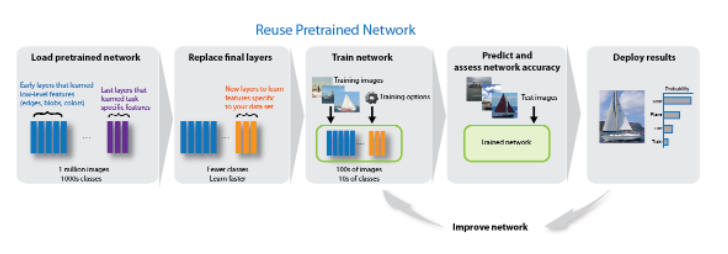

Fine tuning is a way of appliying or utilizing transfer learning. Specifically fine tuning is a process that takes a model that's already been trained for a given task and then tuning or tweaking that model to make it perform a second similiar task. If the two tasks are different and there will be some information that the model has learned that may not apply to our new task or there may be new information that the model needs to learn from the data regarding the new task that wasn't learned from the previous task. 



In this assignment you will implement a transfer learning approach by using weather dataset [1] for image classifitaion task. The dataset consists of a total of 1125 images which are maually labeled as cloudy, sunrise, rainy and sun shine. You will use pre-trained models which are ResNet and InceptionV3 available from Keras [2]. Follow the steps below  to complete the assignment.

[1]: https://data.mendeley.com/datasets/4drtyfjtfy/1

[2]: https://keras.io/api/applications/

**Steps**:

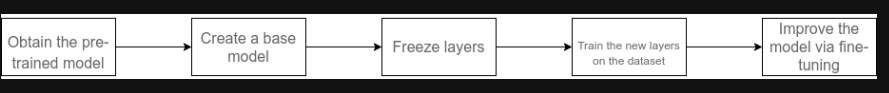


- Obtain the pre-trained model

The first step is to get the pre-trained model that is already given to you. You get pre-trained weights alongside each model. When you download a model, the weights are downloaded automatically. They will be stored in `~/.keras/models/.`

- Create a base model

The first step is to instantiate the base model using the architectures as ResNet and InceptionV3 separately on ImageNet [3]. Download the pre-trained weights. If you don’t download the weights, you will have to use the architecture to train your model from scratch. Recall that the base model will usually have more units in the final output layer than you require. When creating the base model, you, therefore, have to remove the final output layer. Later on, you will add a final output layer that is compatible with your problem. 

- Freeze layers so they don’t change during training

Freezing the layers from the pre-trained model that you do not wish to change is vital. This is because you don’t want the weights in those layers to be changed. If they are, then you may lose all the learning fast. This will be no different from training the model from scratch. Of course, there is an option for slowly changing the weights to tune to the new dataset by specificly providing smaller learning rates for some of the layers to tune to the new dataset slowly. In this case, you do not need to freeze such layers but provide suitable learning rates instead. These selections depend on the problem and the architecture you work with, and should be decided according to some empirical observations.

- Add new trainable layers

The next step is to add new trainable layers that will turn old features into predictions on the new dataset. This is important because the pre-trained model is loaded without the final output layer. 

- Train the new layers on the dataset

Remember that the pre-trained model’s final output will most likely be different from the output that you want for your model.  You will add some new dense layers as you please, but most importantly, a final dense layer with units corresponding to the number of outputs expected by your model. 

- Improve the model via fine-tuning

Once you have done the previous step, you will have a model that can make predictions on your dataset. Now improve its performance through fine-tuning.

- Summarize history for accuracy

Plot a graph to demonstrate accuracy scores in train versus test sets. In your plot use x-axes for epoch and y a-axes for accuracy scores. Don't forget to add your comments for your graph.

**Notes:** 

- You will earn 50 points for each model if you complete all required steps defined above. 

- Don't forget to explain your codes in each step.

- Use separate code cells for each step.

- You can use deep learning frameworks such as Keras, Pytorch etc.

- Due date: 10.05.2022


[3]: https://keras.io/api/applications/#classify-imagenet-classes-with-resnet50








In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam 

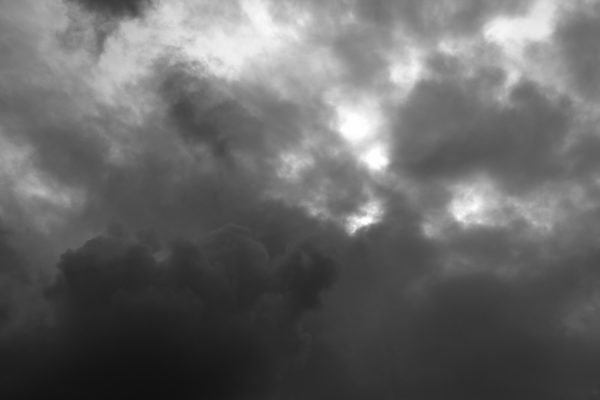

In [3]:
import pathlib
data_dir = pathlib.Path("dataset")

cloudy = list(data_dir.glob("Cloudy/*"))
PIL.Image.open(str(cloudy[0]))

In [5]:
#We are choosing a size for all images to resize that size
img_height,img_width=120,120
#We are choosing how many images working on same time
batch_size=24

#Splitting trainind data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Splitting validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1125 files belonging to 4 classes.
Using 900 files for training.


InternalError: cudaGetDevice() failed. Status: initialization error

In [ ]:
#We define how many classes we have
number_of_classes = 4
#We create our model 
base_model = Sequential()
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#imagenet means we take weights from model being trained from imagenet data
#İnclude top false means we can add our own input
#We have 4 classes and our images has 120 120 shape 
pre_model = tf.keras.applications.ResNet50(include_top=False,
                       weights= "imagenet",
                        classes=4,
                        pooling='avg',
                        input_shape=(120,120,3)
                         )
#freeze pretrained resnet50 layers
for layer in pre_model.layers:
        layer.trainable=False
#we are adding pretrained model to our model
base_model.add(pre_model)
#We are adding new layers to the model
#We make our model 1 dimension
base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dense(4, activation='softmax'))

base_model.build((None,120,120,3))

In [ ]:
base_model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])
#
history = base_model.fit(train_ds, validation_data=val_ds, epochs=3)


In [ ]:
#I am plotting accuracy epoch graph
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Resnet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train ', 'validation'])
plt.show()
#validation accuracy is 0.95 which is very very good 

In [ ]:
#prediction return and array like [1,0,0,0] the 1 value is prediction we need to say which class 1 is belong so I define an array
classes = ["Cloudy","Rain","Shine","Sunrise"]
#For a small test I am going to test the model one of the images in the dataset
import cv2
image=cv2.imread(str(cloudy[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
#we getting prediction here
pred=base_model.predict(image)
#printing the predictions
output_class=classes[np.argmax(pred)]
print("The predicted class is", output_class)

In [ ]:
#I am resizing images for inceptionv3 model so I resize and recreate the train and val data

#We are choosing a size for all images to resize that size
img_height,img_width=299,299
#We are choosing how many images working on same time
batch_size=24

#Splitting trainind data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Splitting validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
#I am including top here i will remove necessary layers later

base_inception_model = tf.keras.applications.InceptionV3(include_top = True,
                                                      weights = "imagenet",
                                                      input_shape=(299,299,3))


# Make all the layers in the pre-trained model non-trainable
for layer in base_inception_model.layers:
      layer.trainable = False

last_layer = base_inception_model.get_layer('mixed7')

last_output = last_layer.output

#We make our model 1 dimension
output_layer = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
output_layer = layers.Dense(1024, activation = 'relu')(output_layer)

output_layer = layers.Dense  (4, activation = 'softmax')(output_layer)    

#We combine pretrained layers and our ekstra layers 
inception_model = Model( base_inception_model.input, output_layer) 



inception_model.compile(optimizer = "Adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


history = inception_model.fit_generator(train_ds,
                             validation_data = val_ds,
                             steps_per_epoch = 5,
                             epochs = 5,
                             validation_steps = 5,
                             verbose = 1,
                             )

In [ ]:
#I am plotting epoch accuracy graph
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training')
plt.plot(epochs, val_acc, 'b', label='Validation')
plt.title('InceptionV3 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()


plt.show()
#accuracy is 0.65 which is not bad